# QUERY DATA

In [2]:
from TweetCrawler import *
from config import *
import pandas as pd
from model.ModelBristol import *
from utils import *
import matplotlib.pyplot as plt

# INSTANTIATE TweetCrawler object
tweetCrawler = TweetCrawler(DATABASE_URI_RDS_TWEETS)

# SQL STATEMENTS
statement_daily_alltweets = "SELECT COUNT(date_trunc('day', created_at)) AS count, date_trunc('day', created_at) AS day FROM tweets_geo GROUP BY date_trunc('day', created_at)"
statement_daily_bristoltweets = "SELECT COUNT(date_trunc('day', created_at)) AS count, date_trunc('day', created_at) AS day FROM bristol_sem GROUP BY date_trunc('day', created_at)"

# QUERY DATA AND STORE RESULTS
results_daily_alltweets = tweetCrawler.crawl_data_with_connection(statement_daily_alltweets)
results_daily_bristoltweets = tweetCrawler.crawl_data_with_connection(statement_daily_bristoltweets)
df_tweets_protest = tweetCrawler.crawl_data_with_session(
        BristolSEM, text_filters='%protest%', tweet_score=False) # tweets mentioning protest
df_tweets_riot = tweetCrawler.crawl_data_with_session(
        BristolSEM, text_filters='%riot%', tweet_score=False) # tweets mentioning riot
df_tweet_scored_4_5 = tweetCrawler.crawl_data_with_session(
       BristolSEM, text_filters=None, tweet_score=True)

# CONVERT TO DATAFRAME
df_daily_alltweets = pd.DataFrame(results_daily_alltweets .fetchall())
df_daily_alltweets.columns = results_daily_alltweets .keys()

df_daily_bristoltweets = pd.DataFrame(results_daily_bristoltweets.fetchall())
df_daily_bristoltweets.columns =results_daily_bristoltweets.keys()

# GROUP BY DAILY VOLUMES
daily_counts_of_protest_tweets = df_tweets_protest.groupby(df_tweets_protest['created_at'].dt.date).size().reset_index(name='count')
daily_counts_of_riot_tweets = df_tweets_riot.groupby(df_tweets_riot['created_at'].dt.date).size().reset_index(name='count')
df_tweet_scored_4_5 = df_tweet_scored_4_5.groupby(df_tweet_scored_4_5['created_at'].dt.date).size().reset_index(name='count')

# NORMALIZE VOLUMES
df_norm_vol = normalize_volumes_concat(df_daily_alltweets, df_daily_bristoltweets)

# INSPECT
print("All tweets head:\n", df_daily_alltweets.head(5))
#print("Bristol tweets head:\n", df_daily_bristoltweets.head())
#print("Normalized tweet counts head:\n", df_norm_vol.head())
#print("'Protest' tweets head:\n", df_tweets_protest.head())
#print("'Riot' tweets head:\n", df_tweets_riot.head())

Query successful!
Query successful!
Query with 1 Filter works!
Query with filter successful!
Query with 1 Filter works!
Query with filter successful!
Query successful!
All tweets head:
     count        day
0   96789 2021-03-01
1  102121 2021-03-02
2  107588 2021-03-03
3  111134 2021-03-04
4  109465 2021-03-05


# VISUALIZATIONS

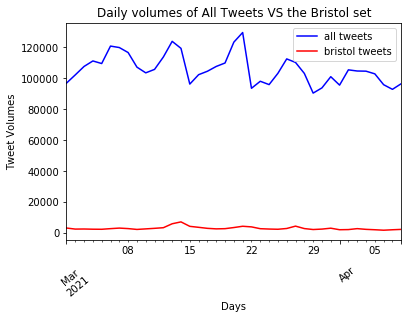

In [3]:
# PLOT DAILY VOLUMES VS THE BRISTOL SET
current_axis = plt.gca()

df_daily_alltweets.plot(kind='line', x='day', y='count', color='blue', ax=current_axis, label="all tweets")
df_daily_bristoltweets.plot(kind='line', x='day', y='count', color='red', ax=current_axis, label="bristol tweets")

current_axis.set_title('Daily volumes of All Tweets VS the Bristol set')
current_axis.set_xlabel('Days')
current_axis.set_ylabel('Tweet Volumes')

# rotate ticks
plt.xticks(rotation=40)

plt.show()

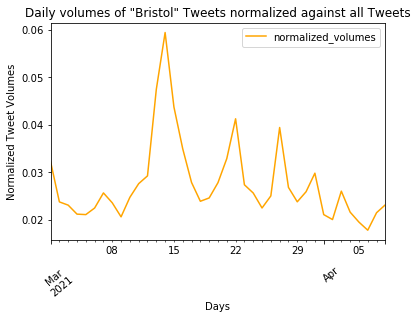

In [4]:
# PLOT NORMALIZED VOLUMES (Bristol Set Volumes / All Tweet Volumes)
current_axis = plt.gca()

df_norm_vol.plot(kind='line', x='day', y='norm_vol', color='orange', ax=current_axis, label='normalized_volumes')

current_axis.set_title('Daily volumes of "Bristol" Tweets normalized against all Tweets')
current_axis.set_xlabel('Days')
current_axis.set_ylabel('Normalized Tweet Volumes')

# rotate ticks
plt.xticks(rotation=40)

plt.show()

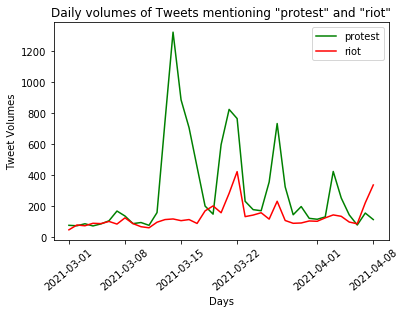

In [5]:
# PLOT VOLUMES for tweets mentioning "protest" and "riot"
current_axis = plt.gca()

daily_counts_of_protest_tweets.plot(kind='line', x='created_at', y='count', color='green', ax=current_axis, label='protest')
daily_counts_of_riot_tweets .plot(kind='line', x='created_at', y='count', color='red', ax=current_axis, label='riot')

current_axis.set_title('Daily volumes of Tweets mentioning "protest" and "riot"')
current_axis.set_xlabel('Days')
current_axis.set_ylabel('Tweet Volumes')

# rotate ticks
plt.xticks(rotation=40)

plt.show()

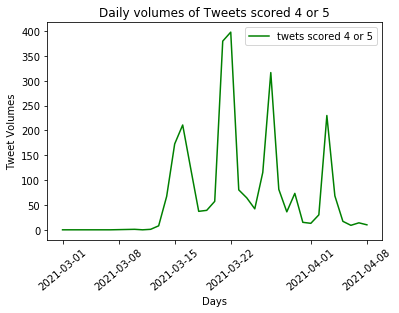

In [6]:
# PLOT VOLUMES OF TWEETS SCORED 4 OR 5
current_axis = plt.gca()

df_tweet_scored_4_5.plot(kind='line', x='created_at', y='count', color='green', ax=current_axis, label='tweets scored 4 or 5')

current_axis.set_title('Daily volumes of Tweets scored 4 or 5')
current_axis.set_xlabel('Days')
current_axis.set_ylabel('Tweet Volumes')

# rotate ticks
plt.xticks(rotation=40)

plt.show()